In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random


# Content-Based Filtering menggunakan Cosine Similarity

## Membuat rekomendasi berdasarkan kriteria
   rekomendasi berdasarkan kriteria menggunakan 4 kriteria<br>
    1.**Halal**<br>
    2.**Area merokok**<br>
    3.**Harga**<br>
    4.**Tempat Parkir**<br>

In [3]:
data ='Downloads/tempat_makan_2022-08-03.csv'
warung = pd.read_csv(data)
print(warung.info())
warung.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              757 non-null    int64  
 1   Latitude        757 non-null    float64
 2   Longitude       757 non-null    float64
 3   Nama_warung     757 non-null    object 
 4   Alamat          757 non-null    object 
 5   Halal           757 non-null    object 
 6   Area_merokok    757 non-null    object 
 7   Harga           757 non-null    object 
 8   Tempat_parkir   757 non-null    object 
 9   Masakan         756 non-null    object 
 10  Makanan         757 non-null    object 
 11  Jenis_warung    757 non-null    object 
 12  Makan_ditempat  757 non-null    object 
 13  Rating          757 non-null    float64
 14  Review          757 non-null    int64  
 15  Gambar          757 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 62.2+ KB
None


,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar
0,1,-7.768875,110.317707,Warung Bakso Babi 08,"Jl. Krandon, Area Sawah, Sidomoyo, Kec. Godean...",non-halal,Ada,Murah,off-street-parking,Indonesia,"Sate,Pork,Bakso",Quick Bites,Dine-in/Takeaway,4.5,52,https://lh5.googleusercontent.com/p/AF1QipNaby...
1,2,-7.765697,110.344304,Rumah Makan 88 / panpan 88,"Jl. Kabupaten KM 1,5 No.98, Nusupan, Trihanggo...",non-halal,Ada,Mahal,on-street-parking,"Chinese,Indonesia,Fusion",Pork,Quick Bites,Dine-in/Takeaway,4.6,671,https://lh5.googleusercontent.com/p/AF1QipMuA7...
2,3,-7.755880,110.383782,Kafe Djawa a.k.a Angkringan Enaknan,"Jalan Kaliurang Km.5,8, Gang Pandega Satya No....",halal,Ada,Murah,on-street-parking,"Jawa,Indonesia,Kafe","Ayam,Daging,Mie,Kopi,Minuman","Kafe,Restoran kasual,Angkringan",Dine-in/Takeaway,4.6,531,https://lh5.googleusercontent.com/p/AF1QipNmmT...
3,4,-7.784784,110.370503,Kali Code Angkringan,"Jl. Prau, Kotabaru, Kec. Gondokusuman, Kota Yo...",halal,Ada,Murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Gorengan","Quick Bites,Street Food,Angkringan",Dine-in/Takeaway,4.3,969,https://lh5.googleusercontent.com/p/AF1QipMMru...
4,5,-7.755350,110.376957,Angkringan Kebun,"Jl. Pandega Marta Jl. Pogung Lor No.316, RT.03...",halal,Ada,Murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Nasi Goreng,Pecel,Mie,Minuman,Gorengan","Quick Bites,Angkringan",Dine-in/Takeaway,4.9,143,https://lh5.googleusercontent.com/p/AF1QipOu__...


In [3]:
warung['Halal'] = warung['Halal'].str.lower()
warung['Harga'] = warung['Harga'].str.lower()
warung['Area_merokok']= warung['Area_merokok'].str.lower()
warung['Tempat_parkir'] = warung['Tempat_parkir'].str.lower()

In [4]:
warung[['Nama_warung','Halal','Area_merokok','Harga','Tempat_parkir']]

,Nama_warung,Halal,Area_merokok,Harga,Tempat_parkir
0,Warung Bakso Babi 08,non-halal,ada,murah,off-street-parking
1,Rumah Makan 88 / panpan 88,non-halal,ada,mahal,on-street-parking
2,Kafe Djawa a.k.a Angkringan Enaknan,halal,ada,murah,on-street-parking
3,Kali Code Angkringan,halal,ada,murah,on-street-parking
4,Angkringan Kebun,halal,ada,murah,on-street-parking
...,...,...,...,...,...
752,Rumah Makan Babi PigGoo Kitchen,non-halal,tidak,menengah,off-street-parking
753,Warung Makan Bakmi Bhayangkara,non-halal,ada,menengah,on-street-parking
754,Bajang Babi Nusantara,non-halal,tidak,menengah,on-street-parking
755,Depot Cipta Rasa Spesial Daging Babi,non-halal,ada,murah,off-street-parking


In [79]:
# warung['Halal'] = warung['Halal'].replace('non-halal','non halal')
# warung['Tempat_parkir'] = warung['Tempat_parkir'].replace('off-street-parking','off street parking')
# warung['Tempat_parkir'] = warung['Tempat_parkir'].replace('on-street-parking','on street parking')

In [38]:
warung['Makanan_list'] = warung['Makanan'].apply(lambda x:x.replace("'", "").replace("[","").replace("]", ""))
warung['Makanan_list'] = warung.Makanan_list.apply(lambda x: x.split(', '))

In [4]:
warung['kriteria'] = warung['Halal'].str.cat(
    warung[['Area_merokok','Harga','Tempat_parkir','Halal']],
    sep=' ')

In [9]:

warung['score'] = ''

In [5]:

#warung['kriteria'] = warung['kriteria'].apply(lambda x: x.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace("http://", " ").replace("https://"," "))
#warung['kriteria'] = warung['kriteria'].apply(lambda x: x.encode('ascii', 'replace').decode('ascii'))
#warung['kriteria'] = warung['kriteria'].apply(lambda x: ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", x).split()))
#mengganti simbol dengan sepasi
warung['kriteria'] = warung['kriteria'].apply(lambda x: x.translate({ord(c): " " 
    for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+—"})) 

In [74]:
warung['kriteria']

0       non halal ada murah off street parking non halal
1        non halal ada mahal on street parking non halal
2                halal ada murah on street parking halal
3                halal ada murah on street parking halal
4                halal ada murah on street parking halal
                             ...                        
752    non halal tidak menengah off street parking no...
753    non halal ada menengah on street parking non h...
754    non halal tidak menengah on street parking non...
755     non halal ada murah off street parking non halal
756    non halal ada menengah off street parking non ...
Name: kriteria, Length: 757, dtype: object

In [82]:
warung.iloc[230]

ID                                                              233
Latitude                                                   -7.74777
Longitude                                                   110.362
Nama_warung                        Babi Q Resto Khusus Masakan Babi
Alamat            Unnamed Road, 55284, Mlati Dukuh, Sendangadi, ...
Halal                                                     non halal
Area_merokok                                                  tidak
Harga                                                      menengah
Tempat_parkir                                     on street parking
Masakan                              Chinese,Medan,Indonesia,Fusion
Makanan                                                   Sate,Pork
Jenis_warung                            Restoran kasual,Quick Bites
Makan_ditempat                                     Dine-in/Takeaway
Rating                                                          4.5
Review                                          

In [66]:
warung.to_csv('warung.csv', index = False)

In [67]:
test1 =pd.read_csv('warung.csv')
test1

,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria
0,1,-7.768875,110.317707,Warung Bakso Babi 08,"Jl. Krandon, Area Sawah, Sidomoyo, Kec. Godean...",non-halal,ada,murah,off-street-parking,Indonesia,"Sate,Pork,Bakso",Quick Bites,Dine-in/Takeaway,4.5,52,https://lh5.googleusercontent.com/p/AF1QipNaby...,non halal ada murah off street parking non halal
1,2,-7.765697,110.344304,Rumah Makan 88 / panpan 88,"Jl. Kabupaten KM 1,5 No.98, Nusupan, Trihanggo...",non-halal,ada,mahal,on-street-parking,"Chinese,Indonesia,Fusion",Pork,Quick Bites,Dine-in/Takeaway,4.6,671,https://lh5.googleusercontent.com/p/AF1QipMuA7...,non halal ada mahal on street parking non halal
2,3,-7.755880,110.383782,Kafe Djawa a.k.a Angkringan Enaknan,"Jalan Kaliurang Km.5,8, Gang Pandega Satya No....",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Kafe","Ayam,Daging,Mie,Kopi,Minuman","Kafe,Restoran kasual,Angkringan",Dine-in/Takeaway,4.6,531,https://lh5.googleusercontent.com/p/AF1QipNmmT...,halal ada murah on street parking halal
3,4,-7.784784,110.370503,Kali Code Angkringan,"Jl. Prau, Kotabaru, Kec. Gondokusuman, Kota Yo...",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Gorengan","Quick Bites,Street Food,Angkringan",Dine-in/Takeaway,4.3,969,https://lh5.googleusercontent.com/p/AF1QipMMru...,halal ada murah on street parking halal
4,5,-7.755350,110.376956,Angkringan Kebun,"Jl. Pandega Marta Jl. Pogung Lor No.316, RT.03...",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Nasi Goreng,Pecel,Mie,Minuman,Gorengan","Quick Bites,Angkringan",Dine-in/Takeaway,4.9,143,https://lh5.googleusercontent.com/p/AF1QipOu__...,halal ada murah on street parking halal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,755,-7.789813,110.393638,Rumah Makan Babi PigGoo Kitchen,"Jl. Timoho No.320, Baciro, Kec. Gondokusuman, ...",non-halal,tidak,menengah,off-street-parking,Indonesia,"Pork,Nasi Goreng,Mie,Nasi Campur",Quick Bites,Dine-in/Takeaway,4.4,504,https://lh5.googleusercontent.com/p/AF1QipN2JT...,non halal tidak menengah off street parking no...
753,756,-7.834035,110.390533,Warung Makan Bakmi Bhayangkara,"Jl. Imogiri Tim., Giwangan, Kec. Umbulharjo, K...",non-halal,ada,menengah,on-street-parking,Indonesia,"Pork,Nasi Goreng,Mie","Quick Bites,Street Food",Dine-in/Takeaway,4.5,141,https://lh5.googleusercontent.com/p/AF1QipPd3G...,non halal ada menengah on street parking non h...
754,757,-7.740378,110.408643,Bajang Babi Nusantara,"Jl. Layur Raya No.10, Mladangan, Minomartani, ...",non-halal,tidak,menengah,on-street-parking,Indonesia,"Sate,Pork,Nasi Campur",Quick Bites,Dine-in/Takeaway,4.6,604,https://lh5.googleusercontent.com/p/AF1QipM_-T...,non halal tidak menengah on street parking non...
755,758,-7.777327,110.450585,Depot Cipta Rasa Spesial Daging Babi,"Jl.Kutilang, Cupuwatu I, Purwomartani, Kec. Ka...",non-halal,ada,murah,off-street-parking,Indonesia,"Pork,Nasi Goreng,Mie",Quick Bites,Dine-in/Takeaway,4.6,50,https://lh5.googleusercontent.com/p/AF1QipMbLj...,non halal ada murah off street parking non halal


In [6]:
#count kriteria
model = CountVectorizer(
    tokenizer = lambda i: i.split(' '), # -> cari split karakter yang unik
    analyzer = 'word'
)
matrix_kriteria = model.fit_transform(warung['kriteria'])
tipe_kriteria = model.get_feature_names()
jumlah_kriteria = len(tipe_kriteria)
event_kriteria = matrix_kriteria.toarray()
#Kode untuk menghitung cosine similarity
score = cosine_similarity(matrix_kriteria)

In [9]:
print (tipe_kriteria)

['ada', 'halal', 'mahal', 'menengah', 'murah', 'non', 'off', 'on', 'parking', 'street', 'tidak']


In [10]:
print(matrix_kriteria[0])

  (0, 0)	1
  (0, 1)	2
  (0, 4)	1
  (0, 5)	2
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1


In [11]:
print (jumlah_kriteria)

11


In [12]:
print(event_kriteria)

[[1 2 0 ... 1 1 0]
 [1 2 1 ... 1 1 0]
 [1 2 0 ... 1 1 0]
 ...
 [0 2 0 ... 1 1 1]
 [1 2 0 ... 1 1 0]
 [1 2 0 ... 1 1 0]]


In [49]:
print(event_kriteria[230])
print(event_kriteria[234])

[0 2 0 1 0 2 0 1 1 1 1]
[1 2 0 1 0 2 0 1 1 1 0]


In [60]:
print(event_kriteria[112])
print(event_kriteria[2])

[0 2 0 0 1 0 1 0 1 1 1]
[1 2 0 0 1 0 0 1 1 1 0]


In [51]:
print(matrix_kriteria[230])

  (0, 1)	2
  (0, 3)	1
  (0, 5)	2
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1


In [13]:
score = cosine_similarity(matrix_kriteria)
score

array([[1.        , 0.84615385, 0.73960026, ..., 0.76923077, 1.        ,
        0.92307692],
       [0.84615385, 1.        , 0.73960026, ..., 0.84615385, 0.84615385,
        0.84615385],
       [0.73960026, 0.73960026, 1.        , ..., 0.64715023, 0.73960026,
        0.64715023],
       ...,
       [0.76923077, 0.84615385, 0.64715023, ..., 1.        , 0.76923077,
        0.84615385],
       [1.        , 0.84615385, 0.73960026, ..., 0.76923077, 1.        ,
        0.92307692],
       [0.92307692, 0.84615385, 0.64715023, ..., 0.84615385, 0.92307692,
        1.        ]])

## Membuat Cosine Similarity Score

In [66]:
#cosine similarity
score = cosine_similarity(matrix_kriteria)
score

array([[1.        , 0.71428571, 0.28571429, ..., 0.57142857, 1.        ,
        0.85714286],
       [0.71428571, 1.        , 0.28571429, ..., 0.71428571, 0.71428571,
        0.71428571],
       [0.28571429, 0.28571429, 1.        , ..., 0.14285714, 0.28571429,
        0.14285714],
       ...,
       [0.57142857, 0.71428571, 0.14285714, ..., 1.        , 0.57142857,
        0.71428571],
       [1.        , 0.71428571, 0.28571429, ..., 0.57142857, 1.        ,
        0.85714286],
       [0.85714286, 0.71428571, 0.14285714, ..., 0.71428571, 0.85714286,
        1.        ]])

## Membuat Machine Learning Prdiction
membuat dummy dataframe untuk prosses kategori data yand ada didalam kolom kriteria

In [7]:
warung_dummy = pd.get_dummies(
    warung,
    columns = ['Halal','Area_merokok','Harga','Tempat_parkir'], 
)
display(warung_dummy.head())

,ID,Latitude,Longitude,Nama_warung,Alamat,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,...,kriteria,Halal_halal,Halal_non-halal,Area_merokok_Ada,Area_merokok_Tidak,Harga_Mahal,Harga_Menengah,Harga_Murah,Tempat_parkir_off-street-parking,Tempat_parkir_on-street-parking
0,1,-7.768875,110.317707,Warung Bakso Babi 08,"Jl. Krandon, Area Sawah, Sidomoyo, Kec. Godean...",Indonesia,"Sate,Pork,Bakso",Quick Bites,Dine-in/Takeaway,4.5,...,non halal Ada Murah off street parking non halal,0,1,1,0,0,0,1,1,0
1,2,-7.765697,110.344304,Rumah Makan 88 / panpan 88,"Jl. Kabupaten KM 1,5 No.98, Nusupan, Trihanggo...","Chinese,Indonesia,Fusion",Pork,Quick Bites,Dine-in/Takeaway,4.6,...,non halal Ada Mahal on street parking non halal,0,1,1,0,1,0,0,0,1
2,3,-7.755880,110.383782,Kafe Djawa a.k.a Angkringan Enaknan,"Jalan Kaliurang Km.5,8, Gang Pandega Satya No....","Jawa,Indonesia,Kafe","Ayam,Daging,Mie,Kopi,Minuman","Kafe,Restoran kasual,Angkringan",Dine-in/Takeaway,4.6,...,halal Ada Murah on street parking halal,1,0,1,0,0,0,1,0,1
3,4,-7.784784,110.370503,Kali Code Angkringan,"Jl. Prau, Kotabaru, Kec. Gondokusuman, Kota Yo...","Jawa,Indonesia,Yogyakarta","Sate,Gorengan","Quick Bites,Street Food,Angkringan",Dine-in/Takeaway,4.3,...,halal Ada Murah on street parking halal,1,0,1,0,0,0,1,0,1
4,5,-7.755350,110.376957,Angkringan Kebun,"Jl. Pandega Marta Jl. Pogung Lor No.316, RT.03...","Jawa,Indonesia,Yogyakarta","Sate,Nasi Goreng,Pecel,Mie,Minuman,Gorengan","Quick Bites,Angkringan",Dine-in/Takeaway,4.9,...,halal Ada Murah on street parking halal,1,0,1,0,0,0,1,0,1


menentukan variabel independen dan dependent

In [9]:
#label encoder
from sklearn.preprocessing import LabelEncoder
category_col = ['Halal','Area_merokok','Harga','Tempat_parkir']
labelencoder = LabelEncoder()
warung['kriteria_cat'] = labelencoder.fit_transform(warung['kriteria'])
warung.head()


,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria,kriteria_cat
0,1,-7.768875,110.317707,Warung Bakso Babi 08,"Jl. Krandon, Area Sawah, Sidomoyo, Kec. Godean...",non-halal,ada,murah,off-street-parking,Indonesia,"Sate,Pork,Bakso",Quick Bites,Dine-in/Takeaway,4.5,52,https://lh5.googleusercontent.com/p/AF1QipNaby...,non halal ada murah off street parking non halal,16
1,2,-7.765697,110.344304,Rumah Makan 88 / panpan 88,"Jl. Kabupaten KM 1,5 No.98, Nusupan, Trihanggo...",non-halal,ada,mahal,on-street-parking,"Chinese,Indonesia,Fusion",Pork,Quick Bites,Dine-in/Takeaway,4.6,671,https://lh5.googleusercontent.com/p/AF1QipMuA7...,non halal ada mahal on street parking non halal,13
2,3,-7.755880,110.383782,Kafe Djawa a.k.a Angkringan Enaknan,"Jalan Kaliurang Km.5,8, Gang Pandega Satya No....",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Kafe","Ayam,Daging,Mie,Kopi,Minuman","Kafe,Restoran kasual,Angkringan",Dine-in/Takeaway,4.6,531,https://lh5.googleusercontent.com/p/AF1QipNmmT...,halal ada murah on street parking halal,5
3,4,-7.784784,110.370503,Kali Code Angkringan,"Jl. Prau, Kotabaru, Kec. Gondokusuman, Kota Yo...",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Gorengan","Quick Bites,Street Food,Angkringan",Dine-in/Takeaway,4.3,969,https://lh5.googleusercontent.com/p/AF1QipMMru...,halal ada murah on street parking halal,5
4,5,-7.755350,110.376957,Angkringan Kebun,"Jl. Pandega Marta Jl. Pogung Lor No.316, RT.03...",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Nasi Goreng,Pecel,Mie,Minuman,Gorengan","Quick Bites,Angkringan",Dine-in/Takeaway,4.9,143,https://lh5.googleusercontent.com/p/AF1QipOu__...,halal ada murah on street parking halal,5


In [8]:
x = warung_dummy.drop(
    ['ID','Latitude','Longitude','Nama_warung','Alamat','Masakan','Makanan',
    'Makan_ditempat','kriteria','Jenis_warung','Rating','Review','Gambar'], axis=1
)
display(x.head())

,Halal_halal,Halal_non-halal,Area_merokok_Ada,Area_merokok_Tidak,Harga_Mahal,Harga_Menengah,Harga_Murah,Tempat_parkir_off-street-parking,Tempat_parkir_on-street-parking
0,0,1,1,0,0,0,1,1,0
1,0,1,1,0,1,0,0,0,1
2,1,0,1,0,0,0,1,0,1
3,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,1,0,1


In [156]:
display(x)

,Halal_halal,Halal_non halal,Area_merokok_ada,Area_merokok_tidak,Harga_mahal,Harga_menengah,Harga_murah,Tempat_parkir_off street parking,Tempat_parkir_on street parking
0,0,1,1,0,0,0,1,1,0
1,0,1,1,0,1,0,0,0,1
2,1,0,1,0,0,0,1,0,1
3,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
742,1,0,0,1,0,0,1,0,1
743,1,0,1,0,0,0,1,1,0
744,1,0,1,0,0,0,1,0,1
745,1,0,0,1,1,0,0,1,0


In [9]:
y = warung_dummy['Nama_warung']
display(y.head())

0                   Warung Bakso Babi 08
1             Rumah Makan 88 / panpan 88
2    Kafe Djawa a.k.a Angkringan Enaknan
3                   Kali Code Angkringan
4                       Angkringan Kebun
Name: Nama_warung, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.67, random_state = 5)

In [17]:
print(X_train.shape)
X_train

(249, 9)


,Halal_halal,Halal_non-halal,Area_merokok_ada,Area_merokok_tidak,Harga_mahal,Harga_menengah,Harga_murah,Tempat_parkir_off-street-parking,Tempat_parkir_on-street-parking
272,1,0,1,0,0,1,0,1,0
577,1,0,0,1,0,1,0,0,1
213,1,0,1,0,0,0,1,0,1
590,1,0,1,0,0,0,1,1,0
83,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
73,1,0,1,0,0,1,0,1,0
400,1,0,1,0,0,0,1,0,1
118,1,0,0,1,0,1,0,0,1
701,1,0,1,0,0,1,0,1,0


In [18]:
print(X_test.shape)

(508, 9)


In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

scaled_df = pd.DataFrame(x, columns=x.columns)
scaled_df.head()

,Halal_halal,Halal_non-halal,Area_merokok_ada,Area_merokok_tidak,Harga_mahal,Harga_menengah,Harga_murah,Tempat_parkir_off-street-parking,Tempat_parkir_on-street-parking
0,0,1,1,0,0,0,1,1,0
1,0,1,1,0,1,0,0,0,1
2,1,0,1,0,0,0,1,0,1
3,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,1,0,1


In [118]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=3)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

NameError: name 'scaled_df' is not defined

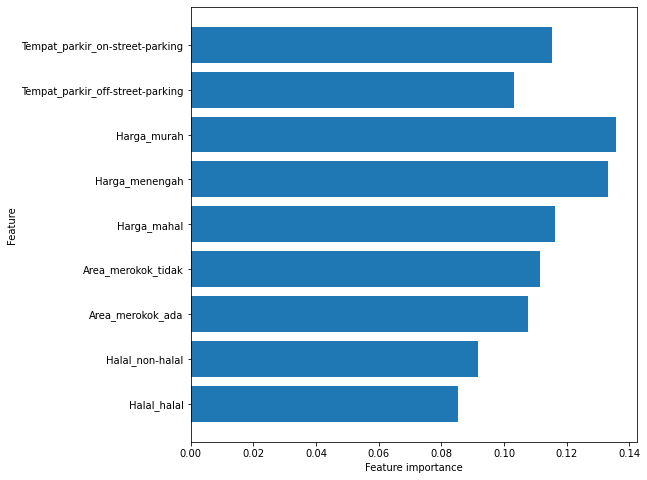

In [58]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

In [56]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                               precision    recall  f1-score   support

                                         A&M Co Sushi Express       0.00      0.00      0.00       1.0
                                      ANEKA GORENGAN MOLEN 97       0.00      0.00      0.00       1.0
                                           AYAM BAKAR PAK DIN       0.00      0.00      0.00       1.0
                                               Alesha Biryani       0.00      0.00      0.00       1.0
                            Aneka Dimsum Jogja ( huma dimsum)       0.00      0.00      0.00       1.0
                                            Aneka Kost 24 Jam       0.00      0.00      0.00       1.0
                                             Angkringan Kebun       0.00      0.00      0.00       1.0
                                          Angkringan Ke

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state =1234)
rf_clf = RandomForestClassifier(criterion='gini',n_estimators=5,random_state=1, n_jobs=2)
rf_clf.fit(X_train, y_train)

# scoring model
# print('Accuracy = {}%'.format(round(rf_clf.score(X_train, y_train) * 100, 2)))
# print(rf_clf.score(x, y))
# prediction
# print(rf_clf.predict([[1,0,1,0,0,0,1,1,0]])[0])

y_pred = rf_clf.predict(X_test)
# print('Accuracy = {}%'.format(round(rf_clf.score(y_test, y_pred) * 100, 2)))
rf_clf.predict_proba(X_test)
rf_clf.classes_
rf_clf.feature_importances_

array([0.08684304, 0.08643164, 0.11945567, 0.08815172, 0.12632717,
       0.17001857, 0.13530436, 0.08957595, 0.09789188])

In [15]:
importances = rf_clf.feature_importances_
columns = x.columns
i = 0
while i < len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importances[i]*100,2)}%.")
    i+=1

 The importance of feature 'Halal_halal' is 8.68%.
 The importance of feature 'Halal_non-halal' is 8.64%.
 The importance of feature 'Area_merokok_Ada' is 11.95%.
 The importance of feature 'Area_merokok_Tidak' is 8.82%.
 The importance of feature 'Harga_Mahal' is 12.63%.
 The importance of feature 'Harga_Menengah' is 17.0%.
 The importance of feature 'Harga_Murah' is 13.53%.
 The importance of feature 'Tempat_parkir_off-street-parking' is 8.96%.
 The importance of feature 'Tempat_parkir_on-street-parking' is 9.79%.


ValueError: y must be an integer array. Found object. Try passing the array as y.astype(np.int_)

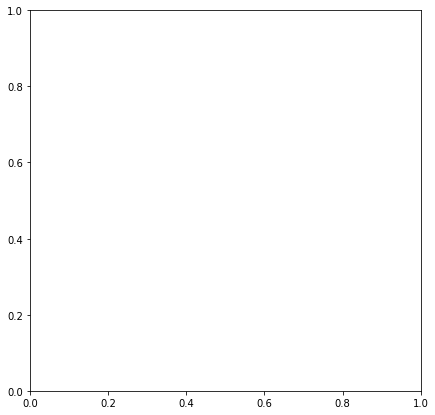

In [22]:
from mlxtend.plotting import plot_decision_regions
 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
 
#
# plot_decision_regions function takes "forest" as classifier
#
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_combined, y_combined, clf=rf_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
y_actual = X_test[:150]
x_pred = X_train[:150]
x_pred

,Halal_halal,Halal_non-halal,Area_merokok_Ada,Area_merokok_Tidak,Harga_Mahal,Harga_Menengah,Harga_Murah,Tempat_parkir_off-street-parking,Tempat_parkir_on-street-parking
272,1,0,1,0,0,1,0,1,0
577,1,0,0,1,0,1,0,0,1
213,1,0,1,0,0,0,1,0,1
590,1,0,1,0,0,0,1,1,0
83,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
220,1,0,1,0,0,0,1,0,1
13,1,0,1,0,0,1,0,1,0
723,1,0,1,0,0,0,1,1,0
584,1,0,1,0,0,1,0,0,1


In [288]:
np.array(y_test)[:15]

array(['Bakpia Kukus Tugu Jogja', 'Ayam Fillet Crispy Bu Heni',
       'Pempek Ny. Kamto Gejayan', 'Bajang Babi Nusantara',
       'Sei Sapi Gajahmungkur', 'Sate Babi Ketandan',
       'Waroeng Sentong (Seneng Lontong)', 'Ayam Bakar Jago',
       'Ayam Kremes Bu Mimin', 'Mangut Lele 319', 'Nasi Balap Ardhi',
       'Boss Gorengan', 'Warung Mak E', 'Lontong Medan Wak Idan',
       'RM & Restoran Parangtritis'], dtype=object)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       143
           1       0.00      0.00      0.00         7
           2       0.73      0.74      0.73       100
           3       0.46      0.44      0.45        50
           4       0.00      0.00      0.00         8
           5       0.28      0.28      0.28        47
           6       0.65      0.66      0.66        95
           7       0.33      0.32      0.32        38
           8       0.77      0.79      0.78       112

   micro avg       0.68      0.68      0.68       600
   macro avg       0.46      0.46      0.46       600
weighted avg       0.68      0.68      0.68       600
 samples avg       0.68      0.68      0.68       600



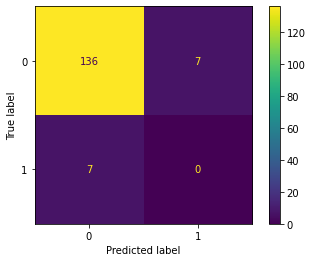

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_actual.values.argmax(axis=1),y_pred.values.argmax(axis=1))
print(classification_report(y_actual,x_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [12]:
y = y[:500]
pred2 =pred2[:500]

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                      precision    recall  f1-score   support

                                                                A&M Co Sushi Express       0.20      1.00      0.33         1
                                                                  ANGKRINGAN BAROKAH       0.00      0.00      0.00         1
                                                                  AYAM BAKAR PAK DIN       0.00      0.00      0.00         1
                                                                   AYAM BAKAR PEMUDA       0.00      0.00      0.00         1
                                                       AYAM GEPREK DAN KREMES MAS ER       0.00      0.00      0.00         1
                                                         AYAM GORENG LESEHAN PAK DIN       0.00      0.00      0.00         1
                                                          AYAM KREMES & GEPREK RIZKY       0.00      0.00      0.00  

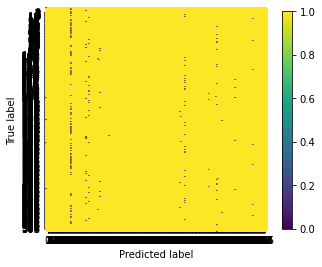

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y,pred2)
print(classification_report(y,pred2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [304]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
# print(confusion_matrix([1,0,0,1,0,0,1,1,0],[0,1,1,0,0,0,1,1,0]))
# print(classification_report([1,0,0,1,0,0,1,1,0],[0,1,1,0,0,0,1,1,0]))

                                                               precision    recall  f1-score   support

                                         A&M Co Sushi Express       0.00      0.00      0.00       2.0
                                           ANGKRINGAN BAROKAH       0.00      0.00      0.00       1.0
                                           AYAM BAKAR PAK DIN       0.00      0.00      0.00       1.0
                                            AYAM BAKAR PEMUDA       0.00      0.00      0.00       1.0
                                  AYAM GORENG LESEHAN PAK DIN       0.00      0.00      0.00       1.0
                            Aneka Dimsum Jogja ( huma dimsum)       0.00      0.00      0.00       1.0
                                            Aneka Kost 24 Jam       0.00      0.00      0.00       1.0
                                       Aneka gorengan sangaji       0.00      0.00      0.00       1.0
                                             Angkringan Kebun       0.00

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
y_pred_bool = np.argmax(y_pred, axis=0)

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_bool)
print(classification_report(y_test,y_pred_bool))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

TypeError: Singleton array 1 cannot be considered a valid collection.

In [168]:
confusion_matrix?

In [49]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
    
    # Load data
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
    
#     # Create list of target class names
# class_names = iris.target_names
classifier = DecisionTreeClassifier()
y_hat = classifier.fit(X_train, y_train).predict(X_test)
# print(classification_report(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


<i>Machine Learning</i> memprediksi nama warung berdasarkan kriteria berikut :<br>
<br>
 1.**Halal** = **halal**<br>
 2.**Area Merokok** = **Ada**<br>
 3.**Harga** = **Murah**<br>
 4.**Tempat Parkir** = **off-street-parking**<br>

In [172]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
log_reg.fit(x, y)

# scoring model
print('Accuracy = {}%'.format(round(log_reg.score(x, y) * 100, 2)))

# prediction
print(log_reg.predict([[1,0,1,0,0,0,1,1,0]])[0])

Accuracy = 2.81%
Mugi Mojo Kitchen


In [80]:
# kernel svm model
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma = 0.5)
svm.fit(x, y)

# scoring model
print('Accuracy = {}%'.format(round(svm.score(x, y) * 100, 2)))

# prediction
print(svm.predict([[1,0,1,0,0,0,1,1,0]])[0])

Accuracy = 2.81%
kitchen Oriental Seafood


In [103]:
# naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# scoring model
print('Accuracy = {}%'.format(round(gnb.score(x, y) * 100, 2)))

# prediction
print(gnb.predict([[1,0,1,0,0,0,1,1,0]])[0])

Accuracy = 2.41%
Aneka Bubur "Assalam"


In [102]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dct_clf = DecisionTreeClassifier(criterion = 'entropy')
dct_clf.fit(X_train, y_train)

# scoring model
print('Accuracy = {}%'.format(round(dct_clf.score(x, y) * 100, 2)))

# prediction
print(dct_clf.predict([[0,1,1,0,0,0,1,1,0]])[0])

Accuracy = 2.41%
Aneka Bubur "Assalam"


In [11]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state =0)
rf_clf.fit(x, y)

# prediction
pred2 = rf_clf.predict(x)

# scoring model
print('Accuracy = {}%'.format(round(rf_clf.score(x, y) * 100, 2)))

Accuracy = 3.17%


In [84]:
display(warung[warung['Nama_warung'] == 'Mugi Mojo Kitchen'])
display(warung[warung['Nama_warung'] == 'kitchen Oriental Seafood'])
display(warung[warung['Nama_warung'] == 'Aneka Bubur "Assalam"'])
display(warung[warung['Nama_warung'] == 'Woko Wader mangut'])

,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria
258,261,-7.724268,110.380645,Mugi Mojo Kitchen,"Jl. Sadewa No.414, Tegal Rejo, Sariharjo, Kec....",halal,ada,murah,off street parking,"Jawa,Indonesia","Tahu Tek,Lontong","Restoran kasual,Quick Bites",Dine-in/Takeaway,5.0,6,https://lh5.googleusercontent.com/p/AF1QipPWEX...,halal ada murah off street parking


,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria
690,693,-7.750924,110.410149,kitchen Oriental Seafood,"Jl. Super Raya No.169-177, Dero, Condongcatur,...",halal,ada,murah,off street parking,"Chinese,Indonesia,Asia,Fusion","Ayam,Ikan,Seafood,Hot Plate","Restoran kasual,Quick Bites",Dine-in/Takeaway,4.7,136,https://lh5.googleusercontent.com/p/AF1QipOWt7...,halal ada murah off street parking


,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria
622,625,-7.760825,110.380502,"Aneka Bubur ""Assalam""","Karang Wuni, Caturtunggal, Kec. Depok, Kabupat...",halal,ada,murah,off street parking,Indonesia,Bubur Kacang Ijo,Quick Bites,Dine-in/Takeaway,4.1,25,https://lh5.googleusercontent.com/p/AF1QipOq3x...,halal ada murah off street parking


,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria
590,593,-7.831751,110.463049,Woko Wader mangut,"Onggoparum, Srimulyo, Kec. Piyungan, Bantul",halal,ada,murah,off street parking,"Jawa,Indonesia,Yogyakarta","Ikan,Mangut Lele","Restoran kasual,Quick Bites",Dine-in/Takeaway,4.5,133,https://lh5.googleusercontent.com/p/AF1QipPWXX...,halal ada murah off street parking


<h2> Membuat <i>recommendation System</i> berdasarkan kriteria</h2> <br>
    dari hasil prediksi yang didapat penelti memilih <i>Random Forest Classifer</i> peneliti ingin mendapatkan 5 rekoemdasi yang meiliki <i>cosine similarity</i> > 84%

In [180]:
# test model 1, 0, 0, 1, 0, 0, 1, 0, 1
warung_fav = rf_clf.predict([[1,0,0,1,0,0,1,0,1]])[0]

display(warung[warung['Nama_warung'] == warung_fav])

# take the index from warung_fav
index_fav = warung[warung['Nama_warung'] == warung_fav].index.values[0]
# print(index_fav)

# list all restuarants + cosine similarity score
all_warung = list(enumerate(score[index_fav]))
# count = 0
for i in all_warung:
    warung['score']= all_warung[count][1]
    count+=1
# print(all_warung)

# show similar restaurant, sorted by score
warung_similar = sorted(
    all_warung,
    key = lambda i: i[1],
    reverse = True
)

# print(resto_similar)

,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria,score
663,666,-7.770968,110.41793,"Nasi Balap Green Bamboo,Babarsari","Babarsari Tb 17 No 37 A, Jl. Tambak Bayan, RT....",halal,tidak,murah,on-street-parking,"Indonesia,Lombok",Nasi Balap,Quick Bites,Cuma Takeaway,4.8,6,https://lh5.googleusercontent.com/p/AF1QipNlXn...,halal tidak murah on street parking halal,0.5547


IndexError: list index out of range

In [17]:
warung.iloc[248]

ID                                                              251
Latitude                                                   -7.78632
Longitude                                                   110.302
Nama_warung                DJOMED br. Tampubolon ( Rm daging babi )
Alamat            Jalan Pandawa RT.05/RW.18, Gancakan Wetan, Sid...
Halal                                                     non-halal
Area_merokok                                                    ada
Harga                                                      menengah
Tempat_parkir                                    off-street-parking
Masakan                              Chinese,Medan,Indonesia,Fusion
Makanan                            Pork,Nasi Goreng,Soto,Sop,Bakmie
Jenis_warung                            Restoran kasual,Quick Bites
Makan_ditempat                                     Dine-in/Takeaway
Rating                                                          4.7
Review                                          

In [85]:
all_warung

[(0, 0.6471502289294339),
 (1, 0.6471502289294339),
 (2, 0.8888888888888891),
 (3, 0.8888888888888891),
 (4, 0.8888888888888891),
 (5, 0.8888888888888891),
 (6, 0.8888888888888891),
 (7, 0.7777777777777779),
 (8, 0.7777777777777779),
 (9, 0.7777777777777779),
 (10, 0.7777777777777779),
 (11, 0.7777777777777779),
 (12, 0.7777777777777779),
 (13, 0.6666666666666667),
 (14, 0.7777777777777779),
 (15, 0.6666666666666667),
 (16, 0.7777777777777779),
 (17, 0.6666666666666667),
 (18, 1.0000000000000002),
 (19, 0.554700196225229),
 (20, 0.6666666666666667),
 (21, 0.6666666666666667),
 (22, 0.7777777777777779),
 (23, 0.7777777777777779),
 (24, 0.6666666666666667),
 (25, 0.7777777777777779),
 (26, 0.6666666666666667),
 (27, 0.8888888888888891),
 (28, 0.8888888888888891),
 (29, 0.8888888888888891),
 (30, 0.8888888888888891),
 (31, 0.8888888888888891),
 (32, 0.8888888888888891),
 (33, 0.8888888888888891),
 (34, 0.7777777777777779),
 (35, 0.7777777777777779),
 (36, 0.7777777777777779),
 (37, 0.8888

In [86]:
warung_similar

[(18, 1.0000000000000002),
 (39, 1.0000000000000002),
 (47, 1.0000000000000002),
 (60, 1.0000000000000002),
 (91, 1.0000000000000002),
 (100, 1.0000000000000002),
 (104, 1.0000000000000002),
 (105, 1.0000000000000002),
 (107, 1.0000000000000002),
 (108, 1.0000000000000002),
 (109, 1.0000000000000002),
 (115, 1.0000000000000002),
 (126, 1.0000000000000002),
 (127, 1.0000000000000002),
 (133, 1.0000000000000002),
 (134, 1.0000000000000002),
 (138, 1.0000000000000002),
 (145, 1.0000000000000002),
 (158, 1.0000000000000002),
 (167, 1.0000000000000002),
 (168, 1.0000000000000002),
 (170, 1.0000000000000002),
 (173, 1.0000000000000002),
 (178, 1.0000000000000002),
 (191, 1.0000000000000002),
 (202, 1.0000000000000002),
 (210, 1.0000000000000002),
 (212, 1.0000000000000002),
 (217, 1.0000000000000002),
 (221, 1.0000000000000002),
 (222, 1.0000000000000002),
 (229, 1.0000000000000002),
 (252, 1.0000000000000002),
 (271, 1.0000000000000002),
 (278, 1.0000000000000002),
 (288, 1.0000000000000002

In [170]:
# list all warung filter by cosine similarity score > 84%
warung_recom = []
for i in warung_similar:
    if i[1] >= 0.84:
        warung_recom.append(i)
    else:
        pass

# show 5 datas randomly
import random
#random.sample(range(23), 10)
for i in range(23):
    rekomendasi = random.sample(warung_recom, 10)
#rekomendasi = random.choices(list(warung_recom), k = 10)

for i in rekomendasi:
    print('Warung = {} | Halal = {} | Area Merokok = {} | Harga = {} | Tempat parkir = {}'.format(
        warung.iloc[i[0]]['Nama_warung'],
        warung.iloc[i[0]]['Halal'],
        warung.iloc[i[0]]['Area_merokok'],
        warung.iloc[i[0]]['Harga'],
        warung.iloc[i[0]]['score'])
    )

    

Warung = Gorengan & Fried Chicken yu asih | Halal = halal | Area Merokok = tidak | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Lontong sayur & soto 9A | Halal = halal | Area Merokok = ada | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Bubur Kacang Ijo Madura Cak Adit | Halal = halal | Area Merokok = ada | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Tamala Fried Chicken | Halal = halal | Area Merokok = tidak | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Nasi Balap Green Bamboo Sambisari | Halal = halal | Area Merokok = ada | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Gorengan Bu Asih | Halal = halal | Area Merokok = ada | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Nasi balap Dik Imyut | Halal = halal | Area Merokok = ada | Harga = murah | Tempat parkir = 0.554700196225229
Warung = Fride | Halal = halal | Area Merokok = tidak | Harga = murah | Tempat parkir = 0.554700196225229
Warung = MIE GACOAN C

In [179]:
print(warung[warung['Nama_warung'] == 'Lontong sayur & soto 9A'])
warung.iloc[17]

      ID  Latitude   Longitude              Nama_warung  \
351  354 -7.786614  110.384139  Lontong sayur & soto 9A   

                                                Alamat  Halal Area_merokok  \
351  Jl. Kusbini No.53, Demangan, Kec. Gondokusuman...  halal          ada   

     Harga      Tempat_parkir         Masakan  Makanan Jenis_warung  \
351  murah  on-street-parking  Jawa,Indonesia  Lontong  Quick Bites   

       Makan_ditempat  Rating  Review  \
351  Dine-in/Takeaway     5.0       1   

                                                Gambar  \
351  https://lh5.googleusercontent.com/p/AF1QipNIss...   

                                    kriteria   score  
351  halal ada murah on street parking halal  0.5547  


ID                                                               18
Latitude                                                   -7.83975
Longitude                                                   110.389
Nama_warung                                         RM Pondok Ndeso
Alamat                Jl. Raya Imogiri Timur, Yogyakarta, Indonesia
Halal                                                         halal
Area_merokok                                                    ada
Harga                                                      menengah
Tempat_parkir                                    off-street-parking
Masakan                                              Jawa,Indonesia
Makanan                                           Ayam,Ikan,Seafood
Jenis_warung                      Restoran kasual,Restoran Keluarga
Makan_ditempat                                     Dine-in/Takeaway
Rating                                                          4.3
Review                                          

In [100]:
#rekomendasi = random.choices(warung_recom, k = 5)
list_rekom = []
for i in warung_recom:
    ambil_rekom = {}
    ambil_rekom['Nama_warung'] = warung.iloc[i[0]]['Nama_warung'],
    ambil_rekom['Halal'] = warung.iloc[i[0]]['Halal'],
    ambil_rekom['Area_merokok'] = warung.iloc[i[0]]['Area_merokok'],
    ambil_rekom['Harga'] = warung.iloc[i[0]]['Harga'],
    ambil_rekom['Tempat_parkir'] = warung.iloc[i[0]]['Tempat_parkir'],
    ambil_rekom['Latitude'] = warung.iloc[i[0]]['Latitude'],
    ambil_rekom['Longitude'] = warung.iloc[i[0]]['Longitude']
    
    list_rekom.append(ambil_rekom)
   
    

In [101]:
list_rekom

[{'Nama_warung': ('Pan Pan Rice Bowl',),
  'Halal': ('halal',),
  'Area_merokok': ('tidak',),
  'Harga': ('murah',),
  'Tempat_parkir': ('on-street-parking',),
  'Latitude': (-7.7841352,),
  'Longitude': 110.3755456},
 {'Nama_warung': ('Pizza Apa Ya Mirota Jakal',),
  'Halal': ('halal',),
  'Area_merokok': ('tidak',),
  'Harga': ('murah',),
  'Tempat_parkir': ('on-street-parking',),
  'Latitude': (-7.7528677,),
  'Longitude': 110.3846249},
 {'Nama_warung': ('Kraux2',),
  'Halal': ('halal',),
  'Area_merokok': ('tidak',),
  'Harga': ('murah',),
  'Tempat_parkir': ('on-street-parking',),
  'Latitude': (-7.7769903,),
  'Longitude': 110.3223601},
 {'Nama_warung': ('MIE GACOAN COLOMBO',),
  'Halal': ('halal',),
  'Area_merokok': ('tidak',),
  'Harga': ('murah',),
  'Tempat_parkir': ('on-street-parking',),
  'Latitude': (-7.7776225,),
  'Longitude': 110.3848359},
 {'Nama_warung': ('Warunk Comelk',),
  'Halal': ('halal',),
  'Area_merokok': ('tidak',),
  'Harga': ('murah',),
  'Tempat_parkir'

In [30]:
ambil_rekom

{'Nama_warung': ('DJOMED br. Tampubolon ( Rm daging babi )',),
 'Halal': ('non-halal',),
 'Area_merokok': ('ada',),
 'Harga': ('menengah',),
 'Tempat_parkir': ('off-street-parking',),
 'Latitude': (-7.786317,),
 'Longitude': 110.3023263}

In [53]:
warung_recom = []
count = 0
for i in warung_similar:
    if i[1] >= 0.84:
        warung_recom.append(i)
        
    else:
        pass

In [56]:
warung_recom

[(747, 0.9999999999999998),
 (0, 0.9230769230769229),
 (749, 0.9230769230769229),
 (752, 0.9230769230769229),
 (755, 0.9230769230769229),
 (19, 0.846153846153846),
 (230, 0.846153846153846),
 (233, 0.846153846153846),
 (235, 0.846153846153846),
 (236, 0.846153846153846),
 (238, 0.846153846153846),
 (239, 0.846153846153846),
 (242, 0.846153846153846),
 (244, 0.846153846153846),
 (245, 0.846153846153846),
 (246, 0.846153846153846),
 (248, 0.846153846153846),
 (748, 0.846153846153846),
 (750, 0.846153846153846),
 (751, 0.846153846153846),
 (754, 0.846153846153846),
 (756, 0.846153846153846)]

In [55]:
warung


,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria,score
0,1,-7.768875,110.317707,Warung Bakso Babi 08,"Jl. Krandon, Area Sawah, Sidomoyo, Kec. Godean...",non-halal,ada,murah,off-street-parking,Indonesia,"Sate,Pork,Bakso",Quick Bites,Dine-in/Takeaway,4.5,52,https://lh5.googleusercontent.com/p/AF1QipNaby...,non halal ada murah off street parking non halal,0.923077
1,2,-7.765697,110.344304,Rumah Makan 88 / panpan 88,"Jl. Kabupaten KM 1,5 No.98, Nusupan, Trihanggo...",non-halal,ada,mahal,on-street-parking,"Chinese,Indonesia,Fusion",Pork,Quick Bites,Dine-in/Takeaway,4.6,671,https://lh5.googleusercontent.com/p/AF1QipMuA7...,non halal ada mahal on street parking non halal,0.923077
2,3,-7.755880,110.383782,Kafe Djawa a.k.a Angkringan Enaknan,"Jalan Kaliurang Km.5,8, Gang Pandega Satya No....",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Kafe","Ayam,Daging,Mie,Kopi,Minuman","Kafe,Restoran kasual,Angkringan",Dine-in/Takeaway,4.6,531,https://lh5.googleusercontent.com/p/AF1QipNmmT...,halal ada murah on street parking halal,0.923077
3,4,-7.784784,110.370503,Kali Code Angkringan,"Jl. Prau, Kotabaru, Kec. Gondokusuman, Kota Yo...",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Gorengan","Quick Bites,Street Food,Angkringan",Dine-in/Takeaway,4.3,969,https://lh5.googleusercontent.com/p/AF1QipMMru...,halal ada murah on street parking halal,0.923077
4,5,-7.755350,110.376957,Angkringan Kebun,"Jl. Pandega Marta Jl. Pogung Lor No.316, RT.03...",halal,ada,murah,on-street-parking,"Jawa,Indonesia,Yogyakarta","Sate,Nasi Goreng,Pecel,Mie,Minuman,Gorengan","Quick Bites,Angkringan",Dine-in/Takeaway,4.9,143,https://lh5.googleusercontent.com/p/AF1QipOu__...,halal ada murah on street parking halal,0.923077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,755,-7.789813,110.393638,Rumah Makan Babi PigGoo Kitchen,"Jl. Timoho No.320, Baciro, Kec. Gondokusuman, ...",non-halal,tidak,menengah,off-street-parking,Indonesia,"Pork,Nasi Goreng,Mie,Nasi Campur",Quick Bites,Dine-in/Takeaway,4.4,504,https://lh5.googleusercontent.com/p/AF1QipN2JT...,non halal tidak menengah off street parking no...,0.923077
753,756,-7.834035,110.390533,Warung Makan Bakmi Bhayangkara,"Jl. Imogiri Tim., Giwangan, Kec. Umbulharjo, K...",non-halal,ada,menengah,on-street-parking,Indonesia,"Pork,Nasi Goreng,Mie","Quick Bites,Street Food",Dine-in/Takeaway,4.5,141,https://lh5.googleusercontent.com/p/AF1QipPd3G...,non halal ada menengah on street parking non h...,0.923077
754,757,-7.740378,110.408643,Bajang Babi Nusantara,"Jl. Layur Raya No.10, Mladangan, Minomartani, ...",non-halal,tidak,menengah,on-street-parking,Indonesia,"Sate,Pork,Nasi Campur",Quick Bites,Dine-in/Takeaway,4.6,604,https://lh5.googleusercontent.com/p/AF1QipM_-T...,non halal tidak menengah on street parking non...,0.923077
755,758,-7.777327,110.450585,Depot Cipta Rasa Spesial Daging Babi,"Jl.Kutilang, Cupuwatu I, Purwomartani, Kec. Ka...",non-halal,ada,murah,off-street-parking,Indonesia,"Pork,Nasi Goreng,Mie",Quick Bites,Dine-in/Takeaway,4.6,50,https://lh5.googleusercontent.com/p/AF1QipMbLj...,non halal ada murah off street parking non halal,0.923077


In [201]:
display(warung[warung['Halal'] == 'non_halal'])

,ID,Latitude,Longitude,Nama_warung,Alamat,Halal,Area_merokok,Harga,Tempat_parkir,Masakan,Makanan,Jenis_warung,Makan_ditempat,Rating,Review,Gambar,kriteria
0,1,-7.768875,110.317707,Warung Bakso Babi 08,"Jl. Krandon, Area Sawah, Sidomoyo, Kec. Godean...",non_halal,Ada,Murah,off_street_parking,Indonesia,"Sate,Pork,Bakso",Quick Bites,Dine-in/Takeaway,4.5,52,AF1QipNaby7OGc0DBcboM9zR8cMXbZ3KHGIKA5JculpO=w...,non_halal Ada Murah off_street_parking
1,2,-7.765697,110.344304,Rumah Makan 88 / panpan 88,"Jl. Kabupaten KM 1,5 No.98, Nusupan, Trihanggo...",non_halal,Ada,Mahal,on_street_parking,"Chinese,Indonesia,Fusion",Pork,Quick Bites,Dine-in/Takeaway,4.6,671,AF1QipMuA78dB9x1zyraLsyshQ4_2rk1j95XNJYgPuWZ=s...,non_halal Ada Mahal on_street_parking
19,20,-7.818566,110.364528,Mediterranea Restaurant,"Jl. Tirtodipuran No. 24 A Mantrijeron, Yogyaka...",non_halal,Ada,Mahal,off_street_parking,"Eropa,Mediterania,Perancis,Western,Italia,Dess...","Daging,Burger,Pizza,Kopi,Minuman","Restoran kasual,Diner,Wine Bar",Dine-in/Takeaway,4.7,5106,https://lh3.ggpht.com/p/AF1QipN2MevJ2aAr369_dj...,non_halal Ada Mahal off_street_parking
230,233,-7.747771,110.362017,Babi Q Resto Khusus Masakan Babi,"Unnamed Road, 55284, Mlati Dukuh, Sendangadi, ...",non_halal,Tidak,Menengah,on_street_parking,"Chinese,Medan,Indonesia,Fusion","Sate,Pork","Restoran kasual,Quick Bites",Dine-in/Takeaway,4.5,21,AF1QipNeL2MVmIJuVrARXyJiTo7MOe0nXUhK2Mny6dI=s5...,non_halal Tidak Menengah on_street_parking
232,235,-7.773496,110.411448,Bak & Mie - Spesial Babi Geprek & Mie Babi,"Kompleks Pertokoan Babarsari No.37a, Kledokan,...",non_halal,Ada,Menengah,on_street_parking,"Chinese,Indonesia,Fusion","Pork,Mie",Quick Bites,Dine-in/Takeaway,4.5,367,AF1QipPfxx5JxO9HKiSR2vYn3kHMZvFWt8dLC3E5QWSy=s...,non_halal Ada Menengah on_street_parking
233,236,-7.773472,110.411075,Depot babi YOE,"Unnamed Road, Kledokan, Caturtunggal, Kec. Dep...",non_halal,Ada,Murah,on_street_parking,"Jawa,Indonesia","Sate,Pork,Nasi Goreng,Mie",Quick Bites,Dine-in/Takeaway,4.7,6,AF1QipOx3r7IPwGGWsT52u52N-tFCChLEKgpgKm1LmMi=s...,non_halal Ada Murah on_street_parking
234,237,-7.772725,110.391792,Pothz,"Jl. STM Pembangunan No.14, Santren, Caturtungg...",non_halal,Ada,Menengah,on_street_parking,"Eropa,Indonesia,Western,Fusion","Pork,Nasi Goreng,Burger",Quick Bites,Dine-in/Takeaway,4.6,1281,AF1QipN9xxaISIV5QwMIWsJM6FMuTVWXOEuBn0ycuWS4=s...,non_halal Ada Menengah on_street_parking
235,238,-7.770619,110.397099,Babi Panggang Racing Koh JW,"Jl. Garuda Jl. Pringwulung No.162A, Pringwulun...",non_halal,Tidak,Mahal,on_street_parking,"Chinese,Indonesia","Sate,Pork,Bakso",Quick Bites,Cuma Takeaway,4.5,243,AF1QipO-N3ndA4TpekwXCFwZQgSqL_te2pJ7p6uOqk63=s...,non_halal Tidak Mahal on_street_parking
236,239,-7.762582,110.397731,Lapo Laetta,"Selatan Hartono Mall, Jl. Kaliwaru No.mor 812,...",non_halal,Ada,Menengah,off_street_parking,"Medan,Indonesia","Pork,Mie,Sop,Nasi Campur","Restoran kasual,Quick Bites,Restoran Keluarga",Dine-in/Takeaway,4.5,61,AF1QipM-KlqeesxQ7NLJ8kRFXdOmPMX60SM-GglGkOjR=s...,non_halal Ada Menengah off_street_parking
237,240,-7.782023,110.362401,Kedai Piggies,"Cokrodiningratan, Kec. Jetis, Kota Yogyakarta",non_halal,Ada,Menengah,on_street_parking,"Chinese,Indonesia","Pork,Nasi Goreng,Mie,Mie Ayam,Nasi Campur",Quick Bites,Dine-in/Takeaway,4.2,40,AF1QipNRfSo8FRcjHbWtW1mprNohQp6l3WlG16YrDAry=s...,non_halal Ada Menengah on_street_parking


<h2> Simpan <i>random forest classifier model</i></h2>

In [99]:
import joblib
joblib.dump(rf_clf,'model_warung')

['model_warung']

In [70]:
def recommendation(prediksi):
    #recommended_warung = []

    warung_fav = rf_clf.predict([prediksi])[0]
    matrix_kriteria = model.fit_transform(warung['kriteria'])
    score = cosine_similarity(matrix_kriteria)
    
    index_fav = warung[warung['Nama_warung'] == warung_fav].index.values[0]
    # list all restuarants + cosine similarity score
    all_warung = list(enumerate(score[index_fav]))
    #score
    count = 0
    for i in all_warung:
        warung['score']= all_warung[count][1]
        count+=1
    # show similar restaurant, sorted by score
    warung_similar = sorted(
    all_warung,
    key = lambda i: i[1],
    reverse = True
    )
    warung_recom = []
    for i in warung_similar:
        if i[1] > 0.84:
            warung_recom.append(i)
        else:
            pass

    # show 5 datas randomly
    list_rekom = []
#     rekomendasi = random.choices(warung_recom, k = 5)
    rekomendasi = warung_recom
#     rekomendasi = [i[0] for i in score]
    
    for i in rekomendasi:
     
     print('Warung = {} | Halal = {} | Area Merokok = {} | Harga = {} | Tempat parkir = {}'.format(
        warung.iloc[i[0]]['Nama_warung'],
        warung.iloc[i[0]]['Halal'],
        warung.iloc[i[0]]['Area_merokok'],
        warung.iloc[i[0]]['Harga'],
        warung.iloc[i[0]]['Tempat_parkir'],
        )
        )
    return #recommended_warung

In [71]:
Data = [0,1,0,1,1,0,0,1,0]
recommendation(Data)

Warung = Rumah Makan Babi PigGoo Kitchen | Halal = non-halal | Area Merokok = tidak | Harga = menengah | Tempat parkir = 0.9230769230769229
Warung = Babi Q Resto Khusus Masakan Babi | Halal = non-halal | Area Merokok = tidak | Harga = menengah | Tempat parkir = 0.9230769230769229
Warung = Lapo Laetta | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = 0.9230769230769229
Warung = Warung Makan Bu Kadek Khas Bali | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = 0.9230769230769229
Warung = DJOMED br. Tampubolon ( Rm daging babi ) | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = 0.9230769230769229
Warung = Babi Panggang Koh Asoe | Halal = non-halal | Area Merokok = tidak | Harga = murah | Tempat parkir = 0.9230769230769229
Warung = Bima Kroda | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = 0.9230769230769229
Warung = Sate Babi dan Iga Bakar ( PORK ) | Halal = non-halal | Area Me

In [34]:
Data = [0,1,1,0,0,0,1,0,1]
#prediksi = rf_clf.predict([fitur])[0]
#warung_fav = prediksi
# print(data)
recommendation(Data)

Warung = Lapo Laetta | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = off-street-parking
Warung = Depot babi YOE | Halal = non-halal | Area Merokok = ada | Harga = murah | Tempat parkir = on-street-parking
Warung = Rumah Makan 88 / panpan 88 | Halal = non-halal | Area Merokok = ada | Harga = mahal | Tempat parkir = on-street-parking
Warung = Rocky Daging Babi Segar dan Bakso | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = on-street-parking
Warung = Mc'B (Bukan Babi Biasa) | Halal = non-halal | Area Merokok = ada | Harga = menengah | Tempat parkir = on-street-parking


In [48]:
# mengambil judul buku sebagai input dan output buku yang paling mirip
def rec_tfidf(title, cosine_sim=cosine_sim):
    recommendation = pd.DataFrame(columns = ['Nama_warung', 'Score'])
    matrix_kriteria = model.fit_transform(warung['kriteria'])
    score = cosine_similarity(matrix_kriteria)
    count = 0

    idx = indices[title]
    sim_scores = list(enumerate(score[matrix]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]

    for i in book_indices:
    recommendation.at[count, 'Book Idx'] = book_indices[count]
    recommendation.at[count, 'Title'] = titles.iloc[book_indices[count]]
    recommendation.at[count, 'Score'] = sim_scores[count][1]
    count += 1
return recommendation 

IndentationError: expected an indented block (<ipython-input-48-4609098c13c0>, line 15)

In [38]:
count=0
for i in all_warung:
    
    warung['score']= all_warung[count][1]
    count +=1

In [40]:
warung_recom

NameError: name 'warung_recom' is not defined

In [96]:
warung_fav = rf_clf.predict([[0,1,1,0,0,0,1,0,1]])[0]
matrix_kriteria = model.fit_transform(warung['kriteria'])
score = cosine_similarity(matrix_kriteria)
    
index_fav = warung[warung['Nama_warung'] == warung_fav].index.values[0]

In [99]:
all_warung[index_fav][0]

748

In [ ]:
class recommederSystem :
    def __init__(self, data,content_col)
        self.warung = pd.read_csv(data)
        self.c
    def fit(self):
    def recommend(self):